<a href="https://colab.research.google.com/github/VishalSharma2000/student-grade-prediction/blob/main/student_grade_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Student Grade Prediction**

In [ ]:
# Importing all the needed libraries 

import numpy as np                    # linear algebra
import pandas as pd                   # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas  as pd                  #Data manipulation
import numpy as np                    #Data manipulation
import matplotlib.pyplot as plt       # Visualization
import seaborn as sns                   #Visualization
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split

In [ ]:
# Import the data set

df = pd.read_csv('./student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.shape

(395, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

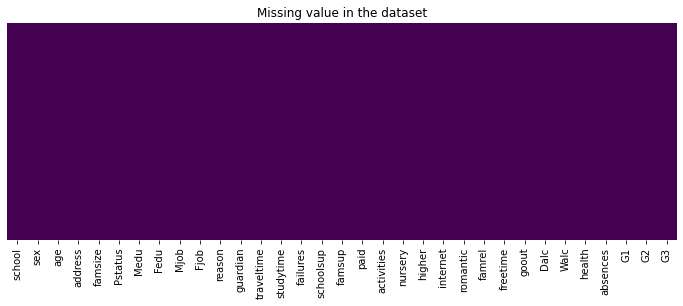

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

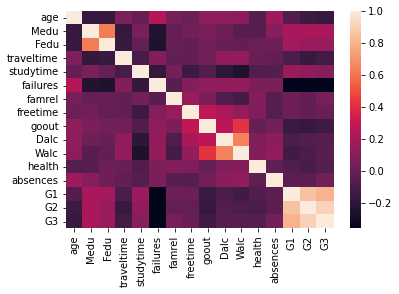

In [ ]:
# Correlation Plot

corr = df.corr()
sns.heatmap(corr)

#Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['G1', 'G2','studytime', 'failures', 'absences']] #Independent variable 
y = df['G3'] #dependent variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Model Building
In this step build model using our linear regression equation θ=(XTX)−1XTy . In first step we need to add a feature x0=1 to our original data set.

##**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

In [ ]:
lm.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

-1.3424721252522396


In [ ]:
predictions = lm.predict(X_test)
print(predictions)

[10.6996771  11.4216477  13.85547793 14.87131769 16.9884453  13.60884797
 12.87871442 11.26692074 13.65742715  8.70588971 11.67645575  7.33843985
  7.27386884 11.66075264 -1.50381788  4.47617917  3.87373499 10.78412072
 10.72206165 13.93343563 14.17291576 13.76853751 12.76272388  8.10078423
  8.17137711 19.37541583  7.11784002  9.75326124  9.35741679 16.18454302
  5.66077329 15.41953734  6.6210399  -0.39707454 10.75508575  9.42534837
 16.1007633   4.47950438  9.69785259  5.07747085  8.66300399  8.63396901
 14.95177219  9.26898404  8.29220539  8.46508176 12.79175886 -0.52307607
  8.35160316 17.3592439   8.49411674 12.8056096   5.43381609  5.99854779
 12.12770885  9.30150441 11.9977182   9.36611077  8.35160316  7.50481516
 12.75873476  4.13840467 12.64924528 11.67763987  7.6710411  11.90341295
 12.28008405 13.259524    9.98926679  9.45438334 11.67246663  9.56786194
  8.43604679  9.53882697 10.89759932  6.06159918 12.72116598 -0.702118
 13.89453904 10.91145007  6.28354332 11.9284588   2.8

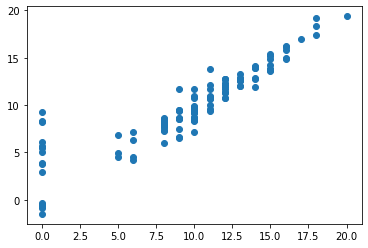

In [ ]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


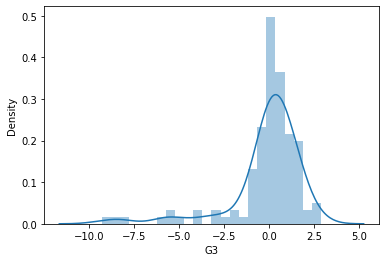

In [ ]:
sns.distplot((y_test-predictions)); 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score)

0.8121817047609586
